# Shark Attack

## Carga de datos

In [1]:
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from src import pandas_project as pp

pd.set_option('display.max_rows', None)

In [2]:
data_shark = pd.read_csv('input/GSAF5.csv',encoding='utf-8')
data = pd.read_csv('input/GSAF5.csv',encoding='utf-8')

In [3]:
data_shark.head()

Case Number       Date  Year        Type    Country      Area  \
0  2016.09.18.c  18-Sep-16  2016  Unprovoked        USA   Florida   
1  2016.09.18.b  18-Sep-16  2016  Unprovoked        USA   Florida   
2  2016.09.18.a  18-Sep-16  2016  Unprovoked        USA   Florida   
3    2016.09.17  17-Sep-16  2016  Unprovoked  AUSTRALIA  Victoria   
4    2016.09.15  16-Sep-16  2016  Unprovoked  AUSTRALIA  Victoria   

                           Location Activity             Name Sex   ...  \
0  New Smyrna Beach, Volusia County  Surfing             male    M  ...   
1  New Smyrna Beach, Volusia County  Surfing   Chucky Luciano    M  ...   
2  New Smyrna Beach, Volusia County  Surfing             male    M  ...   
3                  Thirteenth Beach  Surfing  Rory Angiolella    M  ...   
4                       Bells Beach  Surfing             male    M  ...   

    Species        Investigator or Source                        pdf  \
0        NaN  Orlando Sentinel, 9/19/2016       2016.09.18.c-NSB.pdf   
1        NaN  Orlando Sentinel, 9/19/2016   2016.09.18.b-Luciano.pdf   
2        NaN  Orlando Sentinel, 9/19/2016       2016.09.18.a-NSB.pdf   
3        NaN           The Age, 9/18/2016  2016.09.17-Angiolella.pdf   
4  2 m shark           The Age, 9/16/2016  2016.09.16-BellsBeach.pdf   

                                        href formula  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...   
1  http://sharkattackfile.net/spreadsheets/pdf_di...   
2  http://sharkattackfile.net/spreadsheets/pdf_di...   
3  http://sharkattackfile.net/spreadsheets/pdf_di...   
4  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                href Case Number.1  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...  2016.09.18.c   
1  http://sharkattackfile.net/spreadsheets/pdf_di...  2016.09.18.b   
2  http://sharkattackfile.net/spreadsheets/pdf_di...  2016.09.18.a   
3  http://sharkattackfile.net/spreadsheets/pdf_di...    2016.09.17   
4  http://sharkattackfile.net/spreadsheets/pdf_di...    2016.09.16   

  Case Number.2 original order Unnamed: 22 Unnamed: 23  
0  2016.09.18.c           5993         NaN         NaN  
1  2016.09.18.b           5992         NaN         NaN  
2  2016.09.18.a           5991         NaN         NaN  
3    2016.09.17           5990         NaN         NaN  
4    2016.09.15           5989         NaN         NaN  

[5 rows x 24 columns]

# Data Cleaning

En este apartado vamos a limpiar los datos de la tabla como elegir las columnas que nos resultaran utiles y cuales no y una vez elegidas las columnas las limpiaremos para poder trabajar con ellas en el analisis. Y debido a que centraremos nuestro analisis de los ataques en lugar donde se producen por lo que centraremos los datos en esto.

En primer lugar escogemos las columnas que nos interesan.

Primero nos fijamos en la columnas que tenemos:

In [4]:
data_shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

Aqui podemos observar que las dos ultimas columnas no contienen datos relevantes:

In [5]:
data_shark['Unnamed: 22'].value_counts()

stopped here    1
Name: Unnamed: 22, dtype: int64

In [6]:
data_shark['Unnamed: 23'].value_counts()

Teramo             1
change filename    1
Name: Unnamed: 23, dtype: int64

Por lo que son columnas de las que podemos prescindir:

In [7]:
data_shark = data_shark.drop(columns=['Unnamed: 22','Unnamed: 23'])

In [8]:
data_shark.head()

Case Number       Date  Year        Type    Country      Area  \
0  2016.09.18.c  18-Sep-16  2016  Unprovoked        USA   Florida   
1  2016.09.18.b  18-Sep-16  2016  Unprovoked        USA   Florida   
2  2016.09.18.a  18-Sep-16  2016  Unprovoked        USA   Florida   
3    2016.09.17  17-Sep-16  2016  Unprovoked  AUSTRALIA  Victoria   
4    2016.09.15  16-Sep-16  2016  Unprovoked  AUSTRALIA  Victoria   

                           Location Activity             Name Sex   ...  \
0  New Smyrna Beach, Volusia County  Surfing             male    M  ...   
1  New Smyrna Beach, Volusia County  Surfing   Chucky Luciano    M  ...   
2  New Smyrna Beach, Volusia County  Surfing             male    M  ...   
3                  Thirteenth Beach  Surfing  Rory Angiolella    M  ...   
4                       Bells Beach  Surfing             male    M  ...   

  Fatal (Y/N)   Time   Species        Investigator or Source  \
0           N  13h00        NaN  Orlando Sentinel, 9/19/2016   
1           N  11h00        NaN  Orlando Sentinel, 9/19/2016   
2           N  10h43        NaN  Orlando Sentinel, 9/19/2016   
3           N    NaN        NaN           The Age, 9/18/2016   
4           N    NaN  2 m shark           The Age, 9/16/2016   

                         pdf  \
0       2016.09.18.c-NSB.pdf   
1   2016.09.18.b-Luciano.pdf   
2       2016.09.18.a-NSB.pdf   
3  2016.09.17-Angiolella.pdf   
4  2016.09.16-BellsBeach.pdf   

                                        href formula  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...   
1  http://sharkattackfile.net/spreadsheets/pdf_di...   
2  http://sharkattackfile.net/spreadsheets/pdf_di...   
3  http://sharkattackfile.net/spreadsheets/pdf_di...   
4  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                href Case Number.1  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...  2016.09.18.c   
1  http://sharkattackfile.net/spreadsheets/pdf_di...  2016.09.18.b   
2  http://sharkattackfile.net/spreadsheets/pdf_di...  2016.09.18.a   
3  http://sharkattackfile.net/spreadsheets/pdf_di...    2016.09.17   
4  http://sharkattackfile.net/spreadsheets/pdf_di...    2016.09.16   

  Case Number.2 original order  
0  2016.09.18.c           5993  
1  2016.09.18.b           5992  
2  2016.09.18.a           5991  
3    2016.09.17           5990  
4    2016.09.15           5989  

[5 rows x 22 columns]

Tambien podemos observar las columnas en las que vienen referencias a PDF's que no nos van a resultar utiles

In [9]:
pdf_columns = data_shark.loc[:, ['pdf', 'href formula', 'href']]
pdf_columns.head()

pdf  \
0       2016.09.18.c-NSB.pdf   
1   2016.09.18.b-Luciano.pdf   
2       2016.09.18.a-NSB.pdf   
3  2016.09.17-Angiolella.pdf   
4  2016.09.16-BellsBeach.pdf   

                                        href formula  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...   
1  http://sharkattackfile.net/spreadsheets/pdf_di...   
2  http://sharkattackfile.net/spreadsheets/pdf_di...   
3  http://sharkattackfile.net/spreadsheets/pdf_di...   
4  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                href  
0  http://sharkattackfile.net/spreadsheets/pdf_di...  
1  http://sharkattackfile.net/spreadsheets/pdf_di...  
2  http://sharkattackfile.net/spreadsheets/pdf_di...  
3  http://sharkattackfile.net/spreadsheets/pdf_di...  
4  http://sharkattackfile.net/spreadsheets/pdf_di...

In [10]:
data_shark = data_shark.drop(columns=['pdf','href formula', 'href'])

In [11]:
data_shark.head()

Case Number       Date  Year        Type    Country      Area  \
0  2016.09.18.c  18-Sep-16  2016  Unprovoked        USA   Florida   
1  2016.09.18.b  18-Sep-16  2016  Unprovoked        USA   Florida   
2  2016.09.18.a  18-Sep-16  2016  Unprovoked        USA   Florida   
3    2016.09.17  17-Sep-16  2016  Unprovoked  AUSTRALIA  Victoria   
4    2016.09.15  16-Sep-16  2016  Unprovoked  AUSTRALIA  Victoria   

                           Location Activity             Name Sex   Age  \
0  New Smyrna Beach, Volusia County  Surfing             male    M   16   
1  New Smyrna Beach, Volusia County  Surfing   Chucky Luciano    M   36   
2  New Smyrna Beach, Volusia County  Surfing             male    M   43   
3                  Thirteenth Beach  Surfing  Rory Angiolella    M  NaN   
4                       Bells Beach  Surfing             male    M  NaN   

                                  Injury Fatal (Y/N)   Time   Species   \
0                  Minor injury to thigh           N  13h00        NaN   
1                   Lacerations to hands           N  11h00        NaN   
2               Lacerations to lower leg           N  10h43        NaN   
3           Struck by fin on chest & leg           N    NaN        NaN   
4  No injury: Knocked off board by shark           N    NaN  2 m shark   

        Investigator or Source Case Number.1 Case Number.2  original order  
0  Orlando Sentinel, 9/19/2016  2016.09.18.c  2016.09.18.c            5993  
1  Orlando Sentinel, 9/19/2016  2016.09.18.b  2016.09.18.b            5992  
2  Orlando Sentinel, 9/19/2016  2016.09.18.a  2016.09.18.a            5991  
3           The Age, 9/18/2016    2016.09.17    2016.09.17            5990  
4           The Age, 9/16/2016    2016.09.16    2016.09.15            5989

Tambien podemos ver tres columnas que hacen referencia a numeros de casos que tampoco aportan valor ya que aunque tienen fechas tenemos las columnas de 'Date' y 'Year' que si podemos utilizar

In [12]:
order_columns = data_shark.loc[:, ['Case Number', 'Case Number.1', 'Case Number.2', 'original order']]
order_columns.head()

Case Number Case Number.1 Case Number.2  original order
0  2016.09.18.c  2016.09.18.c  2016.09.18.c            5993
1  2016.09.18.b  2016.09.18.b  2016.09.18.b            5992
2  2016.09.18.a  2016.09.18.a  2016.09.18.a            5991
3    2016.09.17    2016.09.17    2016.09.17            5990
4    2016.09.15    2016.09.16    2016.09.15            5989

In [13]:
data_shark = data_shark.drop(columns=['Case Number', 'Case Number.1', 'Case Number.2', 'original order'])
data_shark.head()

Date  Year        Type    Country      Area  \
0  18-Sep-16  2016  Unprovoked        USA   Florida   
1  18-Sep-16  2016  Unprovoked        USA   Florida   
2  18-Sep-16  2016  Unprovoked        USA   Florida   
3  17-Sep-16  2016  Unprovoked  AUSTRALIA  Victoria   
4  16-Sep-16  2016  Unprovoked  AUSTRALIA  Victoria   

                           Location Activity             Name Sex   Age  \
0  New Smyrna Beach, Volusia County  Surfing             male    M   16   
1  New Smyrna Beach, Volusia County  Surfing   Chucky Luciano    M   36   
2  New Smyrna Beach, Volusia County  Surfing             male    M   43   
3                  Thirteenth Beach  Surfing  Rory Angiolella    M  NaN   
4                       Bells Beach  Surfing             male    M  NaN   

                                  Injury Fatal (Y/N)   Time   Species   \
0                  Minor injury to thigh           N  13h00        NaN   
1                   Lacerations to hands           N  11h00        NaN   
2               Lacerations to lower leg           N  10h43        NaN   
3           Struck by fin on chest & leg           N    NaN        NaN   
4  No injury: Knocked off board by shark           N    NaN  2 m shark   

        Investigator or Source  
0  Orlando Sentinel, 9/19/2016  
1  Orlando Sentinel, 9/19/2016  
2  Orlando Sentinel, 9/19/2016  
3           The Age, 9/18/2016  
4           The Age, 9/16/2016

Por ultimo tenemos la columna 'Investigator or Source' en la que tampoco nos aporta nada saber quien investigó o la fuente del ataque por lo que tambien podemos borrarla

In [14]:
data_shark = data_shark.drop(columns=['Investigator or Source'])
data_shark.head()

Date  Year        Type    Country      Area  \
0  18-Sep-16  2016  Unprovoked        USA   Florida   
1  18-Sep-16  2016  Unprovoked        USA   Florida   
2  18-Sep-16  2016  Unprovoked        USA   Florida   
3  17-Sep-16  2016  Unprovoked  AUSTRALIA  Victoria   
4  16-Sep-16  2016  Unprovoked  AUSTRALIA  Victoria   

                           Location Activity             Name Sex   Age  \
0  New Smyrna Beach, Volusia County  Surfing             male    M   16   
1  New Smyrna Beach, Volusia County  Surfing   Chucky Luciano    M   36   
2  New Smyrna Beach, Volusia County  Surfing             male    M   43   
3                  Thirteenth Beach  Surfing  Rory Angiolella    M  NaN   
4                       Bells Beach  Surfing             male    M  NaN   

                                  Injury Fatal (Y/N)   Time   Species   
0                  Minor injury to thigh           N  13h00        NaN  
1                   Lacerations to hands           N  11h00        NaN  
2               Lacerations to lower leg           N  10h43        NaN  
3           Struck by fin on chest & leg           N    NaN        NaN  
4  No injury: Knocked off board by shark           N    NaN  2 m shark

Ahora nos fijaremos en la columna 'Date':

In [15]:
data_shark.Date.value_counts()

1957                                                                11
1942                                                                 9
1956                                                                 8
1941                                                                 7
1950                                                                 7
1958                                                                 7
1949                                                                 6
No date                                                              6
1970s                                                                5
1959                                                                 5
1955                                                                 5
28-Jul-95                                                            5
05-Oct-03                                                            5
1940                                                                 5
No dat

Como se puede observar tenemos multitud de registros con 'No date':

In [16]:
data_shark.loc[data_shark['Date'] == 'No date']

Date  Year        Type       Country                   Area  \
5907  No date     0  Unprovoked           USA                Florida   
5908  No date     0  Unprovoked       REUNION             Grand'Anse   
5965  No date     0  Unprovoked        GREECE     Dodecanese Islands   
5969  No date     0  Unprovoked  SOUTH AFRICA  Western Cape Province   
5970  No date     0  Unprovoked     AUSTRALIA                    NaN   
5971  No date     0  Unprovoked  SOUTH AFRICA          KwaZulu-Natal   

                     Location  \
5907  Key West, Monroe County   
5908               Petite-�le   
5965              Symi Island   
5969                 Arniston   
5970                      NaN   
5971                  Durban    

                                               Activity              Name  \
5907                                        Kitesurfing        Paul Menta   
5908                              yachtsman in a zodiac               NaN   
5965                                      Sponge diving   Psarofa-gomenes   
5969                                             Wading  Madelaine Dalton   
5970                                       Pearl diving       Jaringoorli   
5971  Swimming in pool formed by construction of a w...        Indian boy   

     Sex   Age                Injury Fatal (Y/N) Time Species   
5907    M  NaN           Hand bitten           N  NaN      NaN  
5908    M  NaN              Survived           N  NaN      NaN  
5965    M  NaN           Head bitten           N  NaN      NaN  
5969    F  NaN          Ankle bitten           N  NaN      NaN  
5970    M  NaN  Lacerations to thigh           N  NaN      NaN  
5971    M  NaN   FATAL, leg severed            Y  NaN      NaN

Por lo que cogeremos esas filas y convertimos el 'No date' en una fecha ficticia:

In [17]:
data_shark.Date = data_shark.Date.replace({"No date": '00-00-'})

In [18]:
data_shark.Date.value_counts()

1957                                                                11
1942                                                                 9
1956                                                                 8
1941                                                                 7
1950                                                                 7
1958                                                                 7
00-00-                                                               6
1949                                                                 6
1940                                                                 5
28-Jul-95                                                            5
12-Apr-01                                                            5
Aug-56                                                               5
1959                                                                 5
05-Oct-03                                                            5
Oct-60

En la columna de 'Year' tenemos tambien varios registros con año 0 por lo que los convertimos a '0000'

In [20]:
data_shark['Year'] = data_shark['Year'].apply(pp.clean_years)

In [1329]:
data_shark['Year'].value_counts()

2015    139
2011    128
2014    125
0000    124
2013    122
2008    121
2009    120
2012    117
2007    112
2016    103
2006    103
2005    103
2010    101
2000     97
1959     93
1960     93
2003     92
2004     92
2001     92
2002     88
1962     86
1961     78
1995     76
1964     66
1999     65
1998     65
1996     61
1963     61
1966     58
1997     57
1992     56
1994     56
1993     56
1988     55
1958     54
1989     53
1956     51
1965     51
1983     50
1975     49
1981     49
1967     48
1968     46
1955     43
1950     43
1970     42
1954     42
1942     41
1957     41
1984     41
1982     40
1976     39
1986     39
1990     38
1991     38
1974     38
1929     37
1985     37
1953     36
1980     35
1987     35
1972     35
1935     32
1951     31
1949     31
1944     31
1936     30
1937     30
1947     30
1969     30
1948     29
1952     29
1931     29
1943     28
1971     28
1932     27
1941     27
1973     27
1934     27
1946     26
1928     26
1930     26
1977     26
1916

Ahora con la suma de estas dos columnas creamos nuestro nuevo campo 'Date' bien formateado

In [1332]:
data_shark['Date'] = data_shark['Date'].apply(pp.clean_date)
data_shark['Date'] = data_shark['Date'].apply(pp.trans_date)
data_shark['Date'] = data_shark.Date.str.cat(data_shark.Year.astype(str), sep='')

In [1333]:
data_shark.head()

Date  Year        Type    Country      Area  \
0  18-09-2016  2016  Unprovoked        USA   Florida   
1  18-09-2016  2016  Unprovoked        USA   Florida   
2  18-09-2016  2016  Unprovoked        USA   Florida   
3  17-09-2016  2016  Unprovoked  AUSTRALIA  Victoria   
4  16-09-2016  2016  Unprovoked  AUSTRALIA  Victoria   

                           Location Activity             Name Sex   Age  \
0  New Smyrna Beach, Volusia County  Surfing             male    M   16   
1  New Smyrna Beach, Volusia County  Surfing   Chucky Luciano    M   36   
2  New Smyrna Beach, Volusia County  Surfing             male    M   43   
3                  Thirteenth Beach  Surfing  Rory Angiolella    M  NaN   
4                       Bells Beach  Surfing             male    M  NaN   

                                  Injury Fatal (Y/N)   Time   Species   
0                  Minor injury to thigh           N  13h00        NaN  
1                   Lacerations to hands           N  11h00        NaN  
2               Lacerations to lower leg           N  10h43        NaN  
3           Struck by fin on chest & leg           N    NaN        NaN  
4  No injury: Knocked off board by shark           N    NaN  2 m shark

In [1334]:
data_shark['Type'].value_counts()

Unprovoked      4386
Provoked         557
Invalid          519
Sea Disaster     220
Boat             200
Boating          110
Name: Type, dtype: int64

In [1335]:
data_shark.Type = data_shark.Type.replace({"Boating": 'Boat'})

In [1336]:
data_shark.Country.value_counts()

USA                               2116
AUSTRALIA                         1279
SOUTH AFRICA                       565
PAPUA NEW GUINEA                   133
NEW ZEALAND                        125
BRAZIL                             102
BAHAMAS                             98
MEXICO                              81
ITALY                               71
FIJI                                62
PHILIPPINES                         59
REUNION                             57
NEW CALEDONIA                       51
MOZAMBIQUE                          44
CUBA                                42
SPAIN                               40
INDIA                               37
EGYPT                               36
CROATIA                             34
PANAMA                              32
JAPAN                               32
IRAN                                29
SOLOMON ISLANDS                     29
GREECE                              25
HONG KONG                           24
JAMAICA                  

In [1337]:
data_shark.columns = data_shark.columns.str.strip()

In [1338]:
data_shark.Country = data_shark.Country.str.strip().str.upper()

In [1339]:
data_shark.Country.value_counts()

USA                               2116
AUSTRALIA                         1279
SOUTH AFRICA                       565
PAPUA NEW GUINEA                   133
NEW ZEALAND                        125
BRAZIL                             102
BAHAMAS                             98
MEXICO                              82
ITALY                               71
FIJI                                65
PHILIPPINES                         60
REUNION                             57
NEW CALEDONIA                       51
MOZAMBIQUE                          44
CUBA                                42
SPAIN                               40
EGYPT                               38
INDIA                               37
CROATIA                             34
PANAMA                              32
JAPAN                               32
IRAN                                29
SOLOMON ISLANDS                     29
GREECE                              25
HONG KONG                           24
JAMAICA                  

In [1340]:
data_shark.Sex.value_counts()

M      4835
F       585
M         2
N         1
lli       1
.         1
Name: Sex, dtype: int64

In [1341]:
data_shark.Sex = data_shark.Sex.replace({"lli": 'M'})

In [1342]:
data_shark.Sex = data_shark.Sex.replace({".": 'N'})

In [1343]:
data_shark.Sex = data_shark.Sex.str.strip()

In [1345]:
data_shark['Injury'] = data_shark['Injury'].apply(pp.clean_injury)

In [1346]:
data_shark.Injury.value_counts()

Indeterminate Injury    1741
Leg Injury              1571
No Injury                980
Foot Injury              792
Arm Injury               455
Hand Injury              334
Chest Injury              84
Head Injury               35
Name: Injury, dtype: int64

In [1347]:
data_shark['Fatal (Y/N)'] = data_shark['Fatal (Y/N)'].replace({"N ": 'N', " N": 'N',"#VALUE!": 'N', "F":'Y',"n": 'N'})

In [1348]:
data_shark['Fatal (Y/N)'].value_counts()

N          4326
Y          1553
UNKNOWN      94
Name: Fatal (Y/N), dtype: int64

In [1351]:
data_shark['Time'] = data_shark['Time'].apply(pp.clean_hour)

In [1354]:
data_shark['Age'] = data_shark['Age'].apply(pp.clean_age)

In [1356]:
data_shark.head()

Date  Year        Type    Country      Area  \
0  18-09-2016  2016  Unprovoked        USA   Florida   
1  18-09-2016  2016  Unprovoked        USA   Florida   
2  18-09-2016  2016  Unprovoked        USA   Florida   
3  17-09-2016  2016  Unprovoked  AUSTRALIA  Victoria   
4  16-09-2016  2016  Unprovoked  AUSTRALIA  Victoria   

                           Location Activity             Name Sex  Age  \
0  New Smyrna Beach, Volusia County  Surfing             male   M   16   
1  New Smyrna Beach, Volusia County  Surfing   Chucky Luciano   M   36   
2  New Smyrna Beach, Volusia County  Surfing             male   M   43   
3                  Thirteenth Beach  Surfing  Rory Angiolella   M    0   
4                       Bells Beach  Surfing             male   M    0   

        Injury Fatal (Y/N)           Time    Species  
0    No Injury           N      Afternoon        NaN  
1  Hand Injury           N        Morning        NaN  
2   Leg Injury           N        Morning        NaN  
3   Leg Injury           N  Indeterminate        NaN  
4    No Injury           N  Indeterminate  2 m shark

In [1357]:
data_shark.Area.value_counts()

Florida                                                           990
New South Wales                                                   468
Queensland                                                        300
Hawaii                                                            282
California                                                        276
KwaZulu-Natal                                                     210
Western Cape Province                                             188
Western Australia                                                 172
Eastern Cape Province                                             156
South Carolina                                                    145
South Australia                                                   103
North Carolina                                                    100
Victoria                                                           81
Texas                                                              71
Pernambuco          

In [1304]:
data_shark.Area = data_shark.Area.str.strip()

In [1363]:
data_shark.drop_duplicates()

Date  Year          Type                         Country  \
0     18-09-2016  2016    Unprovoked                             USA   
1     18-09-2016  2016    Unprovoked                             USA   
2     18-09-2016  2016    Unprovoked                             USA   
3     17-09-2016  2016    Unprovoked                       AUSTRALIA   
4     16-09-2016  2016    Unprovoked                       AUSTRALIA   
5     15-09-2016  2016          Boat                       AUSTRALIA   
6     11-09-2016  2016    Unprovoked                             USA   
7     07-09-2016  2016    Unprovoked                             USA   
8     06-09-2016  2016    Unprovoked                   NEW CALEDONIA   
9     05-09-2016  2016    Unprovoked                             USA   
10    05-09-2016  2016    Unprovoked                       AUSTRALIA   
11    04-09-2016  2016    Unprovoked                             USA   
12    01-09-2016  2016    Unprovoked                             USA   
13    29-08-2016  2016    Unprovoked                             USA   
14    29-08-2016  2016    Unprovoked                             USA   
15    27-08-2016  2016    Unprovoked                         REUNION   
16    25-08-2016  2016    Unprovoked                             USA   
17    07-08-2016  2016    Unprovoked                         BAHAMAS   
18    06-08-2016  2016    Unprovoked                             USA   
19    04-08-2016  2016    Unprovoked                             USA   
20    29-07-2016  2016    Unprovoked                           SPAIN   
21    28-07-2016  2016    Unprovoked                           CHINA   
22    28-07-2016  2016          Boat                       AUSTRALIA   
23    27-07-2016  2016      Provoked                             USA   
24    26-07-2016  2016    Unprovoked                       AUSTRALIA   
25    24-07-2016  2016    Unprovoked                           JAPAN   
26    23-07-2016  2016    Unprovoked                       AUSTRALIA   
27    23-07-2016  2016    Unprovoked                         BAHAMAS   
28    20-07-2016  2016      Provoked                       AUSTRALIA   
29    17-07-2016  2016          Boat                             USA   
30    16-07-2016  2016    Unprovoked                             USA   
31    16-07-2016  2016    Unprovoked                             USA   
32    15-07-2016  2016    Unprovoked                             USA   
33    14-07-2016  2016    Unprovoked                         BAHAMAS   
34    08-07-2016  2016    Unprovoked                           SPAIN   
35    08-07-2016  2016          Boat                             USA   
36    07-07-2016  2016      Provoked                             USA   
37    07-07-2016  2016          Boat                             USA   
38    06-07-2016  2016    Unprovoked                             USA   
39    04-07-2016  2016      Provoked                       AUSTRALIA   
40    27-06-2016  2016    Unprovoked                             USA   
41    25-06-2016  2016    Unprovoked                             USA   
42    24-06-2016  2016    Unprovoked                        COLUMBIA   
43    23-06-2016  2016    Unprovoked                    SOUTH AFRICA   
44    21-06-2016  2016    Unprovoked                             USA   
45    21-06-2016  2016    Unprovoked                             USA   
46    15-06-2016  2016    Unprovoked                             USA   
47    15-06-2016  2016      Provoked                       AUSTRALIA   
48    14-06-2016  2016    Unprovoked                             USA   
49    11-06-2016  2016    Unprovoked                             USA   
50    07-06-2016  2016       Invalid                             USA   
51    05-06-2016  2016    Unprovoked                             USA   
52    05-06-2016  2016    Unprovoked                       AUSTRALIA   
53    04-06-2016  2016    Unprovoked                           EGYPT   
54    02-06-2016  2016    Unprovoked                

In [1309]:
data_shark.count()

Date           5966
Year           5992
Type           5992
Country        5949
Area           5590
Location       5496
Activity       5465
Name           5792
Sex            5425
Age            5992
Injury         5992
Fatal (Y/N)    5973
Time           5992
Species        3058
dtype: int64

# Analisis

In [1367]:
data_shark.describe()

Age
count  5992.000000
mean     14.820761
std      16.862842
min       0.000000
25%       0.000000
50%      13.000000
75%      25.000000
max      87.000000

In [1365]:
data_shark.head()

Date  Year        Type    Country      Area  \
0  18-09-2016  2016  Unprovoked        USA   Florida   
1  18-09-2016  2016  Unprovoked        USA   Florida   
2  18-09-2016  2016  Unprovoked        USA   Florida   
3  17-09-2016  2016  Unprovoked  AUSTRALIA  Victoria   
4  16-09-2016  2016  Unprovoked  AUSTRALIA  Victoria   

                           Location Activity             Name Sex  Age  \
0  New Smyrna Beach, Volusia County  Surfing             male   M   16   
1  New Smyrna Beach, Volusia County  Surfing   Chucky Luciano   M   36   
2  New Smyrna Beach, Volusia County  Surfing             male   M   43   
3                  Thirteenth Beach  Surfing  Rory Angiolella   M    0   
4                       Bells Beach  Surfing             male   M    0   

        Injury Fatal (Y/N)           Time    Species  
0    No Injury           N      Afternoon        NaN  
1  Hand Injury           N        Morning        NaN  
2   Leg Injury           N        Morning        NaN  
3   Leg Injury           N  Indeterminate        NaN  
4    No Injury           N  Indeterminate  2 m shark

In [1393]:
grouped = data_shark.groupby(['Country'])
res = grouped['Country'].count()
country_attacks = pd.DataFrame({'Country':res.index, 'Nº Attacks':res.values})

In [1416]:
top_countrys = country_attacks.sort_values(by=['Nº Attacks'], ascending = False).head(10)

### 10 Top Paises con más ataques

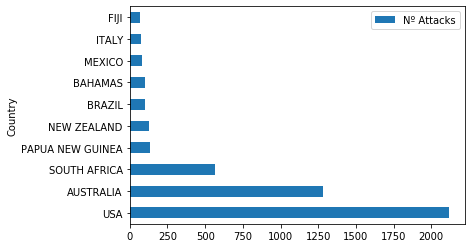

In [1418]:
top_countrys.plot(x ='Country', y='Nº Attacks', kind='barh')

Por lo tanto podemos concluir que el mayor numero de ataques se producen en el continente Americano.

### Bonus

### Top 10 Años con mayor Nº de ataques

In [1440]:
grouped = data_shark.groupby(data_shark['Year'][data_shark['Year'] != '0000'])
res = grouped['Year'].count()
year_attacks = pd.DataFrame({'Year':res.index, 'Nº Attacks':res.values})

In [1441]:
top_years = year_attacks.sort_values(by=['Nº Attacks'], ascending = False).head(10)

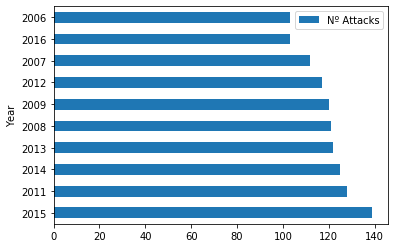

In [1442]:
top_years.plot(x ='Year', y='Nº Attacks', kind='barh')